## Exploratory data analysis

In [1]:
import os
from nltk.corpus import stopwords
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
from wordcloud.wordcloud import WordCloud

In [2]:
punctuations = list(string.punctuation)
stop = stopwords.words('spanish') + stopwords.words('english') + punctuations
stop += ['et', '1', '2', 'j', '3']
words = []
for fname in os.listdir('../data/processed/pdf/'):
    for line in open(os.path.join('../data/processed/pdf/', fname), "rb"):
        sentence = line.decode('utf-8').lower()
        parts = nltk.word_tokenize(sentence)
        important_words = [item for item in parts if item not in stop]
        for i in important_words:
            words.append(i)

In [3]:
print("Hay {} palabras, pero {} son repetidas, osea solo hay {} palabras distintas.".format(len(words), len(words)-len(set(words)), len(set(words)) ) )

Hay 5966152 palabras, pero 5693585 son repetidas, osea solo hay 272567 palabras distintas.


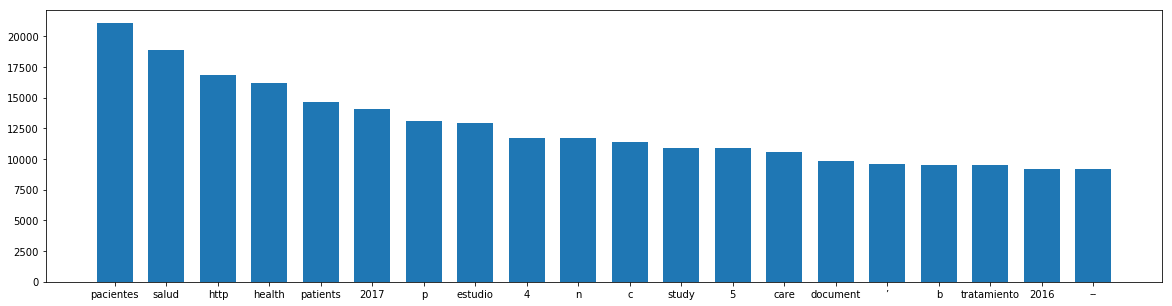

In [4]:
#Palabras que mas aparecen, distribución del número de apariciones de cada palabra?
from collections import Counter
counter = Counter(words)

words_names = [i[0] for i in counter.most_common(20)]
words_counts = [i[1] for i in counter.most_common(20)]

indexes = np.arange(len(words_names))
width = 0.7
plt.figure(figsize=(20,5))
plt.bar(indexes, words_counts, width)
plt.xticks(indexes, words_names)
plt.show()

Distribución del número de apariciones de cada palabra: Esto es un gráfico donde el eje horizontal es el número de apariciones (1,2,3, ....) y el eje vertical es el número de palabras que tienen ese número de apariciones. En plan, la primera barra indicará que hay por ejemplo 8000 palabras que aparecen una sola vez, etc.

In [5]:
len(counter.items())

272567

In [7]:
#Damos la vuelta y keys = numero de apariciones y values = elems que han aparecido ese num de veces
d = {}
for elem, cnt in counter.items():
    d[str(cnt)] = []
for elem, cnt in counter.items():
    d[str(cnt)].append(str(elem))

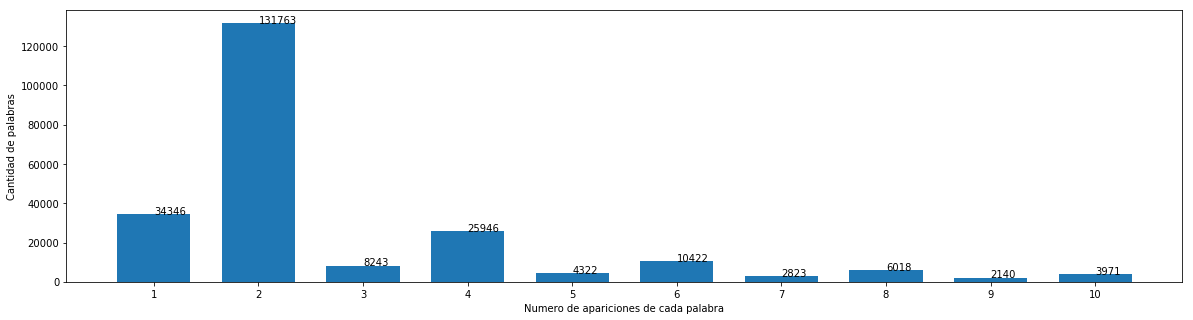

In [8]:
words_names = ('1','2','3','4','5','6','7','8','9','10',)
words_counts = (len(d['1']),len(d['2']),len(d['3']),len(d['4']),len(d['5']),len(d['6']),
                len(d['7']),len(d['8']),len(d['9']),len(d['10']))

indexes = np.arange(len(words_names))
width = 0.7
plt.figure(1,figsize=(20,5))
plt.bar(indexes, words_counts, width)
plt.xticks(indexes, words_names)
plt.ylabel('Cantidad de palabras')
plt.xlabel('Numero de apariciones de cada palabra')
for i,j in zip(words_names,words_counts):
    plt.text(int(i)-1,j,str(j))
plt.show()

Hay que tener en cuenta que aunque entre las palabras mas comunes hay numeros y elementos que entiendo son inicios o fines de palabras, o separacion como pasaba con a b s t r a c t, tampoco daña a word2vec (yo creo)

## Palabras en comun entre el word2vec y el arbol de previous_diagnosis

In [27]:
file_type1 = open("../data/raw/list_desc_type1.txt").read()
tokens1 = nltk.word_tokenize(file_type1)
words_common1 = set(words).intersection(tokens1)
len(words_common1)

3274

In [28]:
d = {x:Counter(tokens1)[x] for x in Counter(tokens1) if x in counter}

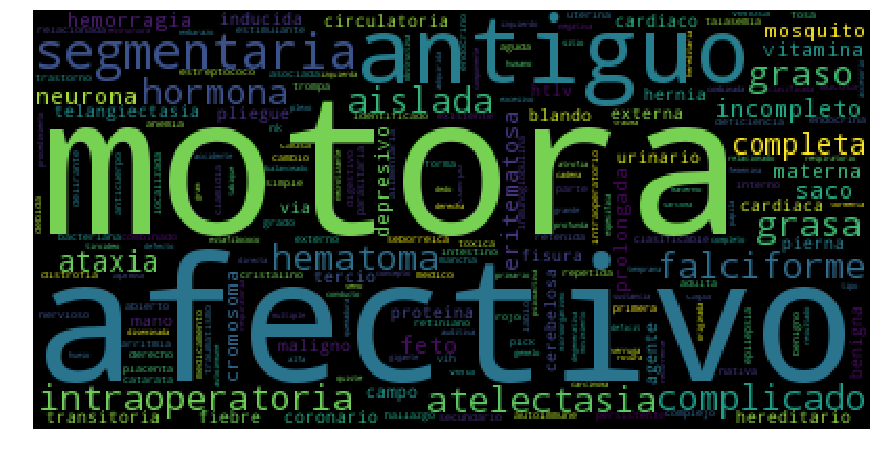

In [29]:
#Foto de tokens en comun en el modelo y en la columna de diagnosticos
wordcloud = WordCloud().generate(' '.join(str(s) for s in words_common1))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
print('Hay {} tokens, {} de ellos no aparecen en los papers, {} si aparecen.'.format(len(tokens1),len(tokens1)-sum(d.values()), sum(d.values())))

Hay 228095 tokens, 111412 de ellos no aparecen en los papers, 116683 si aparecen.


En el arbol de diagnosticos hay 228095 tokens, 116683 tokens aparecen en nuestro modelo, pero 111412 tokens no

In [13]:
d1 = {}
for elem, cnt in d.items():
    d1[str(cnt)] = []
for elem, cnt in d.items():
    d1[str(cnt)].append(str(elem))

In [31]:
#No se ve de manera clara que numeros hay, cuales son los mas pequeños...
print(d1.keys())

116683


In [15]:
#Transformamos la key a int para poder ordenar por key para la visualizacion
d12 = {int(k):v for k,v in d1.items()}
print(sorted(d12.keys()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 101, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 116, 117, 118, 120, 121, 123, 124, 126, 127, 128, 130, 131, 133, 134, 135, 136, 138, 139, 140, 141, 143, 144, 145, 147, 148, 149, 150, 151, 153, 154, 156, 158, 160, 161, 162, 163, 169, 170, 171, 173, 174, 177, 179, 181, 182, 185, 187, 190, 191, 192, 193, 194, 196, 197, 204, 205, 207, 210, 211, 213, 214, 215, 219, 226, 228, 230, 237, 240, 241, 242, 243, 245, 249, 254, 255, 256, 260, 261, 262, 264, 265, 266, 268, 270, 275, 278, 288, 297, 299, 308, 314, 318, 319, 320, 333, 343, 345, 348, 350, 354, 368, 374, 377, 412, 424, 429, 452, 465, 473, 477, 480, 4

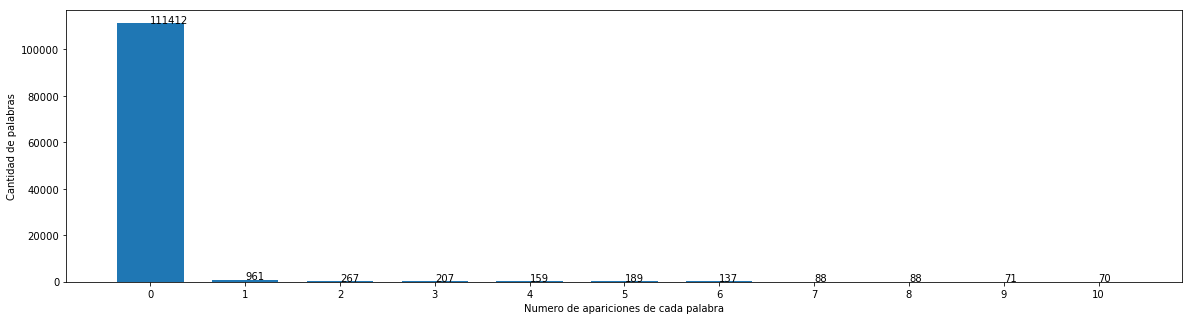

In [32]:
words_names = ('0','1','2','3','4','5','6','7','8','9','10')
words_counts = (len(tokens1)-sum(d.values()),len(d1['1']),len(d1['2']),len(d1['3']),len(d1['4']),len(d1['5']),
                len(d1['6']),len(d1['7']),len(d1['8']),len(d1['9']),len(d1['10']))

indexes = np.arange(len(words_names))
width = 0.7
plt.figure(1,figsize=(20,5))
plt.bar(indexes, words_counts, width)
plt.xticks(indexes, words_names)
plt.ylabel('Cantidad de palabras')
plt.xlabel('Numero de apariciones de cada palabra')
for i,j in zip(words_names,words_counts):
    plt.text(int(i),j,str(j))
plt.show()

## Palabras en comun entre el word2vec y el arbol de sintomas que es el que todavia no esta añadido a la interfaz

In [17]:
file_type2 = open("../data/raw/list_desc_type2.txt").read()
tokens2 = nltk.word_tokenize(file_type2)
words_common2 = set(words).intersection(tokens2)
len(words_common2)

2716

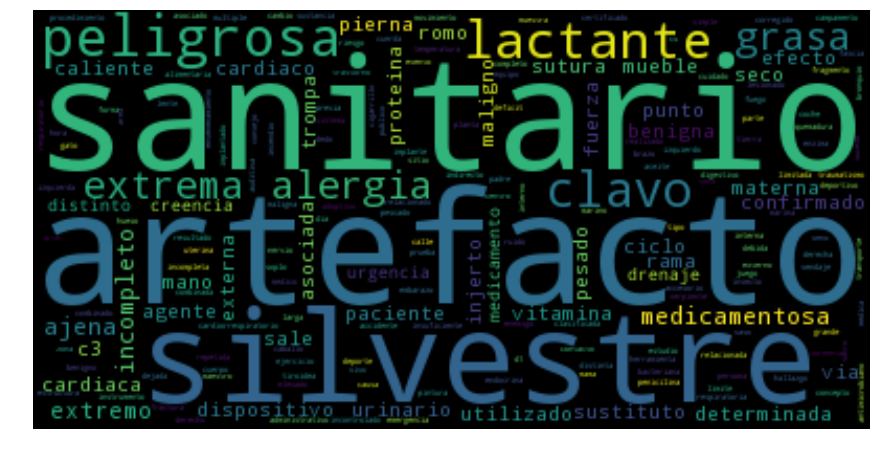

In [18]:
wordcloud = WordCloud().generate(' '.join(str(s) for s in words_common2))
plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Teniendo en cuenta que el tipo 2 eran 64k palabras no pinta muy bien, solo ha pillado casi 3k y muchas seran palabras simples como hallazgo, deportivo... que hubiera pillado con un modelo ya preentrenado, y en el tipo 1 eran 27k y ahi si pilla mas enfermedades

In [19]:
d = {x:Counter(tokens2)[x] for x in Counter(tokens2) if x in counter}

In [20]:
print('Hay {} tokens, {} de ellos no aparecen en los papers, {} si aparecen.'.format(len(tokens2),len(tokens2)-sum(d.values()), sum(d.values())))

Hay 899823 tokens, 441640 de ellos no aparecen en los papers, 458183 si aparecen.


In [21]:
d2 = {}
for elem, cnt in d.items():
    d2[str(cnt)] = []
for elem, cnt in d.items():
    d2[str(cnt)].append(str(elem))

In [22]:
print(d2.keys())

dict_keys(['8', '4', '1', '13157', '50', '46', '92', '144', '10', '171', '374', '324', '285', '25', '66', '2', '77', '8907', '109', '523', '52', '64', '120', '360', '111', '96', '36', '476', '6', '37', '26', '3', '38', '14', '97', '78', '771', '256', '266', '2427', '204', '84', '105', '489', '28', '1440', '2600', '260', '7730', '7727', '381', '2806', '53', '16', '5', '9', '17', '674', '98', '27', '116', '76', '21', '19', '107', '106', '18', '15', '702', '1116', '115', '1377', '3833', '3831', '7', '103', '40', '923', '12', '793', '858', '7256', '95', '33', '11', '104', '102', '29', '307', '51', '167', '30', '245', '320', '221', '68', '75', '31', '391', '467', '1074', '219', '35', '61', '20', '23', '39', '60', '4808', '585', '35465', '24', '351', '123', '43', '32', '70', '45', '137', '181', '13', '323', '34', '269', '79', '159', '217', '108', '65', '42', '807', '67', '1489', '47', '3481', '91', '189', '81', '760', '373', '119', '1114', '183', '90', '249', '3755', '62', '49', '532', '177'

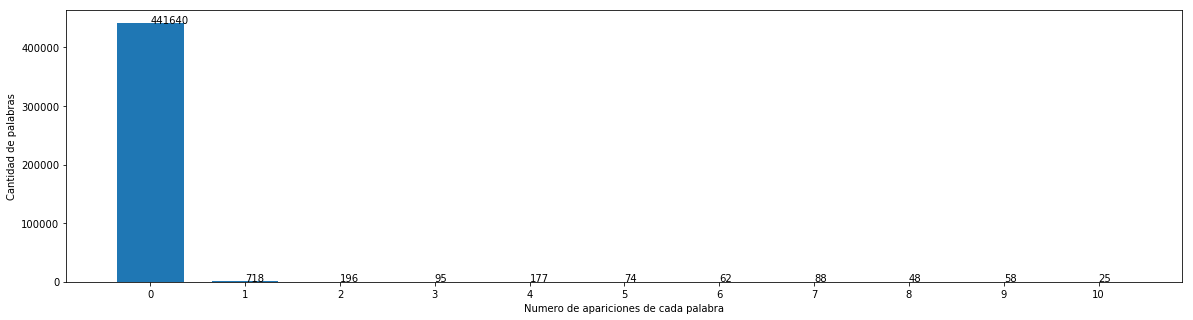

In [23]:
words_names = ('0','1','2','3','4','5','6','7','8','9','10')
words_counts = (len(tokens2)-sum(d.values()),len(d2['1']),len(d2['2']),len(d2['3']),len(d2['4']),len(d2['5']),
                len(d2['6']),len(d1['7']),len(d2['8']),len(d2['9']),len(d2['10']))

indexes = np.arange(len(words_names))
width = 0.7
plt.figure(1,figsize=(20,5))
plt.bar(indexes, words_counts, width)
plt.xticks(indexes, words_names)
plt.ylabel('Cantidad de palabras')
plt.xlabel('Numero de apariciones de cada palabra')
for i,j in zip(words_names,words_counts):
    plt.text(int(i),j,str(j))
plt.show()